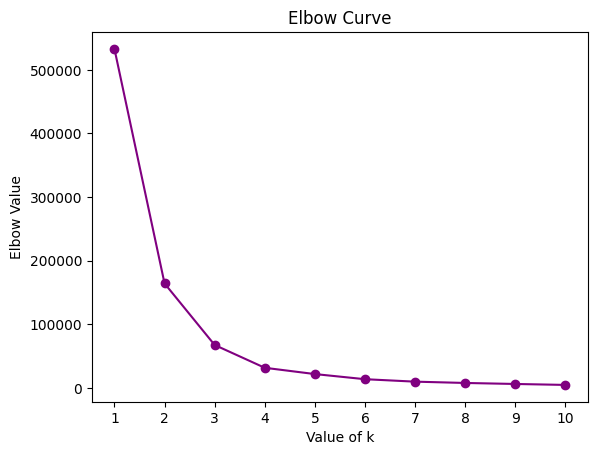

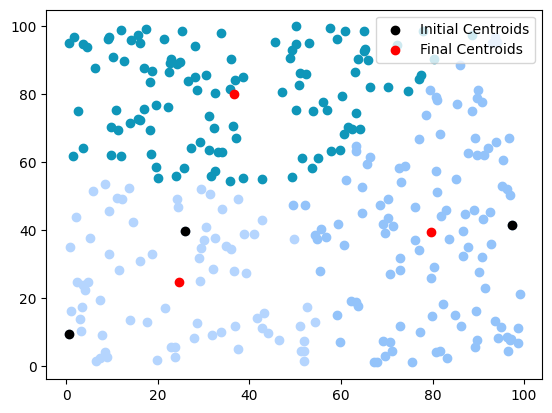

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate synthetic data
np.random.seed(42)
num_points = 300
X = np.random.rand(num_points) * 100
Y = np.random.rand(num_points) * 100

# Define Point class
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return f"({self.x}, {self.y})"

# Calculate Euclidean distance between two points
def distance(p1, p2):
    return np.linalg.norm(np.array([p1.x, p1.y]) - np.array([p2.x, p2.y]))

# Calculate centroid of a group of points
def mean(points):
    if not points:
        return Point(0, 0)
    cx = np.mean([p.x for p in points])
    cy = np.mean([p.y for p in points])
    return Point(cx, cy)

# Find the nearest centroid to a given point
def min_point(p, centroids):
    distances = [distance(p, c) for c in centroids]
    return centroids[np.argmin(distances)]

# Check if two lists of points are the same
def equality(a1, a2):
    return all(p1.x == p2.x and p1.y == p2.y for p1, p2 in zip(a1, a2))

# Perform k-means clustering
def k_means(X, Y, k):
    random_indices = np.random.choice(len(X), k, replace=False)
    initial_centroids = [Point(X[i], Y[i]) for i in random_indices]
    centroids = initial_centroids
    
    while True:
        clusters = {centroid: [] for centroid in centroids}
        
        for x, y in zip(X, Y):
            point = Point(x, y)
            nearest_centroid = min_point(point, centroids)
            clusters[nearest_centroid].append(point)
        
        new_centroids = [mean(points) for points in clusters.values()]
        
        if equality(centroids, new_centroids):
            break
        centroids = new_centroids
    
    return centroids, initial_centroids, clusters

# Calculate sum of squared distances from points to their respective centroids
def sum_sq_dist(centroids, clusters):
    return sum(distance(c, p)**2 for c in centroids for p in clusters[c]) / len(centroids)

# Find the optimal number of clusters using the elbow method
def elbow(X, Y, k_max):
    elbow_values = []
    for k in range(1, k_max + 1):
        centroids, _, clusters = k_means(X, Y, k)
        elbow_values.append(sum_sq_dist(centroids, clusters))
    return elbow_values

# Plot elbow curve
k_max = 10
elbow_values = elbow(X, Y, k_max)
plt.plot(range(1, k_max + 1), elbow_values, marker='o', color='purple')
plt.xticks(range(1, k_max + 1))
plt.xlabel("Value of k")
plt.ylabel("Elbow Value")
plt.title("Elbow Curve")
plt.show()

# Plot scatter plot with initial and final centroids
k = 3
colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(k)]

centroids, initial_centroids, clusters = k_means(X, Y, k)

for color, centroid in zip(colors, centroids):
    for point in clusters[centroid]:
        plt.scatter(point.x, point.y, c=color)

plt.scatter([c.x for c in initial_centroids], [c.y for c in initial_centroids], color="black", label="Initial Centroids")
plt.scatter([c.x for c in centroids], [c.y for c in centroids], color="red", label="Final Centroids")
plt.legend()
plt.show()
